In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Ano com maior quantidade de mortes
1. Longevidade
1. Clube dos 27 (pessoas que morreram com 27 anos)

In [26]:
filename = 'AgeDatasetClean.csv'
df = pd.read_csv(filename,sep='|')
df

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...,...
732956,Wim de Vreng,Dutch swimmer,Male,Kingdom of the Netherlands,Athlete,1930,1980.0,50.0
732957,James Smillie,goudsmid uit Schotland (1784-1841),Male,Scotland,Goldsmith,1784,1841.0,57.0
732958,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,67.0
732959,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,28.0


In [27]:
df.nunique()

Name                 689988
Short description    323654
Gender                   19
Country                5505
Occupation             7750
Birth year             1887
Death year             1928
Age of death             91
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732961 entries, 0 to 732960
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               732961 non-null  object 
 1   Short description  732961 non-null  object 
 2   Gender             732961 non-null  object 
 3   Country            732961 non-null  object 
 4   Occupation         732961 non-null  object 
 5   Birth year         732961 non-null  int64  
 6   Death year         732961 non-null  float64
 7   Age of death       732961 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 44.7+ MB


In [29]:
df.describe()

,Birth year,Death year,Age of death
count,732961.000000,732961.000000,732961.000000
mean,1862.675478,1933.037836,70.362358
std,124.853161,128.017179,15.943488
min,-2284.000000,-2200.000000,11.000000
25%,1847.000000,1914.000000,61.000000
50%,1894.000000,1965.000000,73.000000
75%,1921.000000,1999.000000,82.000000
max,2003.000000,2021.000000,122.000000


In [30]:
df['Gender'].value_counts()

Male                                              659548
Female                                             73286
Transgender Female                                    57
Transgender Male                                      30
Eunuch; Male                                          13
Intersex                                               7
Female; Male                                           5
Transgender Male; Female                               3
Non-Binary                                             2
Female; Female                                         1
Transgender Female; Intersex                           1
Eunuch                                                 1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Female; Male                               1
Intersex; Male                                         1
Transgender Person; Intersex; T

In [31]:
#Adicionando demais Generos na condição Outros
gender_others = (df['Gender'] != 'Male') & (df['Gender'] != 'Female')
df.loc[gender_others, 'Gender'] = 'Others'

In [32]:
df['Gender'].value_counts()

Male      659548
Female     73286
Others       127
Name: Gender, dtype: int64

# Ano com mais morte

Foi feita uma analise para identificar qual o ano com mais mortes. De inicio pensamos que o ano poderia esta diretamente ligado com alguma trágedia, porém ao analisar, vimos que o ano com mais morte foi 2015, que pela nossa pesquisa, não teve grandes trágedias, além da aumento na poluição.

In [33]:
#Contando as mortes
df['Death year'].value_counts()

 2015.0    10182
 2016.0     9963
 2014.0     9958
 2017.0     9705
 2013.0     9672
           ...  
-96.0          1
-84.0          1
 459.0         1
-380.0         1
 944.0         1
Name: Death year, Length: 1928, dtype: int64

Ao analisa em gráficos podemos ver que anterior ao ano 2000 não tivemos muita movimentação:

<AxesSubplot:xlabel='Death year', ylabel='Count'>

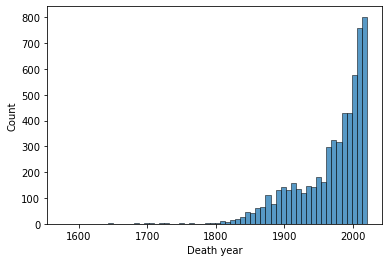

In [34]:
# Graficos de analise em histograma
sns.histplot(df[df['Country']== 'Brazil']['Death year'])

Por tanto resolvemos gerar um novo histograma, contendo mortes posterior aos anos 2000

<AxesSubplot:xlabel='Death year', ylabel='Count'>

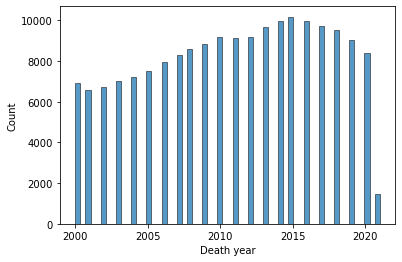

In [35]:
#Graficos de analise em histograma
sns.histplot(df[df['Death year']>= 2000]['Death year'])

In [36]:
# Pais com mais mortes
df['Country'].value_counts()

United States of America                                       145078
Germany                                                         78694
France                                                          64165
United Kingdom; United Kingdom of Great Britain and Ireland     28257
United Kingdom                                                  21270
                                                                ...  
Qing dynasty; Hongkongers                                           1
Sui dynasty; Tang Empire; Chen dynasty; Liang dynasty               1
United States of America; France; Kingdom of Italy                  1
France; Portugalete Canton                                          1
Syria; State of Syria; Syrian Republic                              1
Name: Country, Length: 5505, dtype: int64

# Longevidade

Desmistificando a teoria de que os asiaticos vivem mais (pelo menos as personalidades não). Em analise foi concluido que na media e mediana o pais onde a longevidade é maior seria a Russia. 

In [37]:
#Agrupando país + idade da morte
df_country = df.groupby(["Country"])["Age of death"].agg(["mean", "median","std", "count"])

In [38]:
#Tirando a média, mediana, contagem e desvio padrão
df_country[df_country['count'] > 100].sort_values('mean', ascending=False)

,mean,median,std,count
Country,,,,
Russia; Soviet Union; Russian Empire,88.686567,89.0,5.307190,201
Slovenia; Austria-Hungary; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia,87.279661,87.0,5.629418,118
Slovenia; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia,82.444828,83.0,7.701080,290
People's Republic of China; Republic of China (1912–1949),81.307692,84.0,12.837682,143
United States of America; Austria,79.871324,81.0,12.383851,272
...,...,...,...,...
Qing dynasty; Republic of China (1912–1949),57.352381,56.0,16.334826,105
Crown of Castile,57.236264,60.0,17.962644,182
Kingdom of Scotland,56.241830,58.0,17.532556,306


<!-- 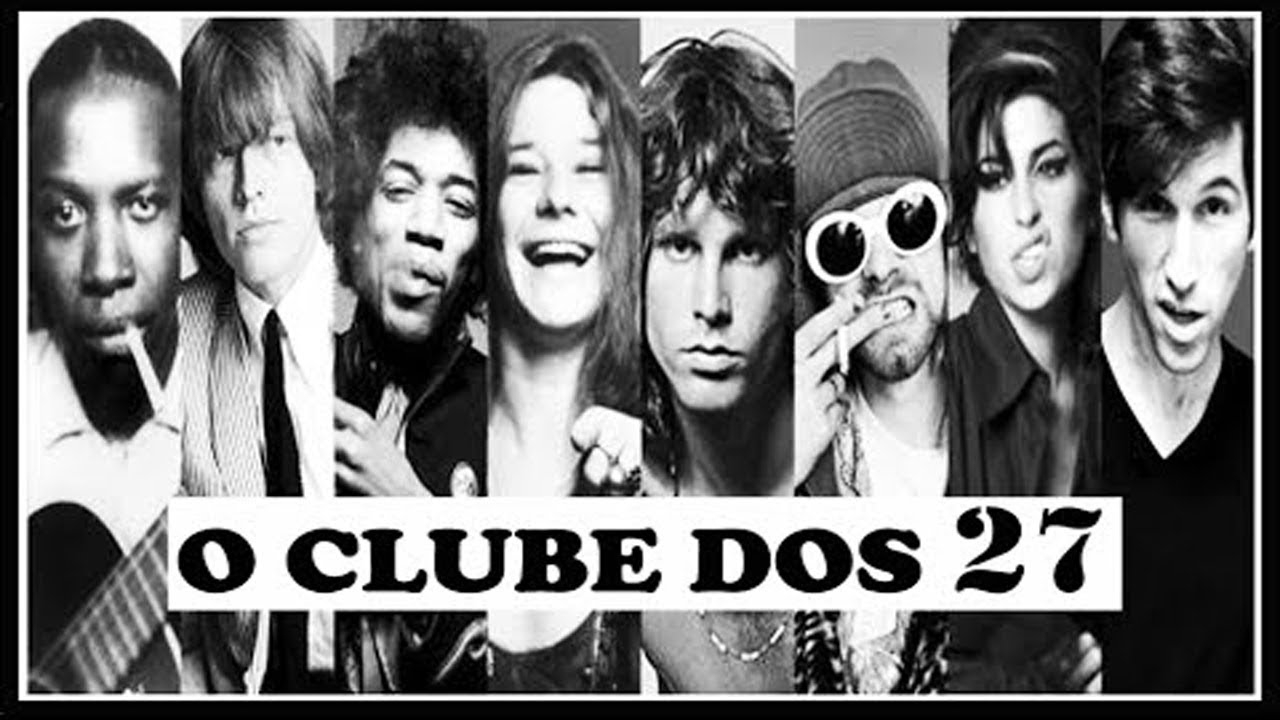 -->

<img src='27anoss.jpg' width='750px'>

Contrariando ~~ou não~~ a teoria de que os mais talentosos morrem aos 27 anos, uma coisa é certa, a idade campeão de mortes entre as personalidades é com 80 anos e a Ocupação/profissão seria atletas.

In [39]:
#Idade com mais mortes
df['Age of death'].value_counts()

80.0     20304
78.0     20076
77.0     20039
79.0     19993
74.0     19884
         ...  
13.0        85
12.0        79
11.0        70
122.0        1
121.0        1
Name: Age of death, Length: 91, dtype: int64

In [40]:
# Ocupação com mais mortes
df[df['Age of death'] == 27]['Occupation'].value_counts()[:10]

Athlete               413
Artist                361
Military personnel    311
Politician            110
Researcher             43
Aristocrat             28
Religious figure       23
Flying ace             17
Engineer               13
Journalist             10
Name: Occupation, dtype: int64

In [41]:
# País com mais morte
df[df['Age of death'] == 27]['Country'].value_counts()[:10]

United States of America                       285
France                                         136
Germany                                        105
United Kingdom of Great Britain and Ireland     99
Kingdom of Italy                                68
United Kingdom                                  43
Spain                                           41
Australia                                       38
Canada                                          33
Sweden                                          25
Name: Country, dtype: int64